In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import sys
sys.path.append("..")
from train_utils import draw_dynamic

2024-02-25 06:58:50.975364: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-25 06:58:52.004146: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-25 06:58:54.767297: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# ResNet 18

In [2]:
model_folder_30 ="/home/jupyter/mnt/s3/rsl-videos/slovo/models/animals/resnet18/"
model_folder_1000 ="/home/jupyter/mnt/s3/rsl-videos/slovo/models/all/resnet18/"
model_name = 'ResNet 18 3D'

data_30 = [
    {'bs': 1, 'lr':'3*10^(-4)', 'filename': 'ResNet18_animals_lr10-4_bs1_loss_acc_dynamic.json'},
    {'bs': 1, 'lr':'3*10^(-5)', 'filename': 'ResNet18_animals_lr10-5_bs1_loss_acc_dynamic.json'},
    {'bs': 4, 'lr':'3*10^(-5)', 'filename': 'ResNet18_animals_lr10-5_bs4_loss_acc_dynamic.json'},
    {'bs': 8, 'lr':'3*10^(-5)', 'filename': 'ResNet18_animals_lr10-5_bs8_loss_acc_dynamic.json'},
    {'bs': 16, 'lr':'3*10^(-5)', 'filename': 'ResNet18_animals_lr10-5_bs16_loss_acc_dynamic.json'},
    {'bs': 1, 'lr':'3*10^(-6)', 'filename': 'ResNet18_animals_lr10-6_bs1_loss_acc_dynamic.json'},
    {'bs': 4, 'lr':'3*10^(-6)', 'filename': 'ResNet18_animals_lr10-6_bs4_loss_acc_dynamic.json'},
    {'bs': 8, 'lr':'3*10^(-6)', 'filename': 'ResNet18_animals_lr10-6_bs16_loss_acc_dynamic.json'},
    {'bs': 16, 'lr':'3*10^(-6)', 'filename': 'ResNet18_animals_lr10-6_bs8_loss_acc_dynamic.json'},
]
data_1000 = [
    {'bs': 1, 'lr':'3*10^(-5)', 'filename': 'ResNet18_all_lr10-5_bs1_loss_acc_dynamic.json'},
    {'bs': 1, 'lr':'3*10^(-6)', 'filename': 'ResNet18_all_lr10-6_bs1_loss_acc_dynamic.json'},
    {'bs': 16, 'lr':'3*10^(-4)', 'filename': 'ResNet18_all_lr10-4_bs16_loss_acc_dynamic.json'},
    {'bs': 16, 'lr':'3*10^(-5)', 'filename': 'ResNet18_all_lr10-5_bs16_loss_acc_dynamic.json'},
    {'bs': 16, 'lr':'3*10^(-6)', 'filename': 'ResNet18_all_lr10-6_bs16_loss_acc_dynamic.json'},
]


batch_sizes_30 = list(set([x['bs'] for x in data_30]))
batch_sizes_30.sort()
batch_sizes_30 = batch_sizes_30 + [0, 0, 0, 0]

batch_sizes_1000 = list(set([x['bs'] for x in data_1000]))
batch_sizes_1000.sort()
batch_sizes_1000 = batch_sizes_1000 + [0, 0, 0, 0]

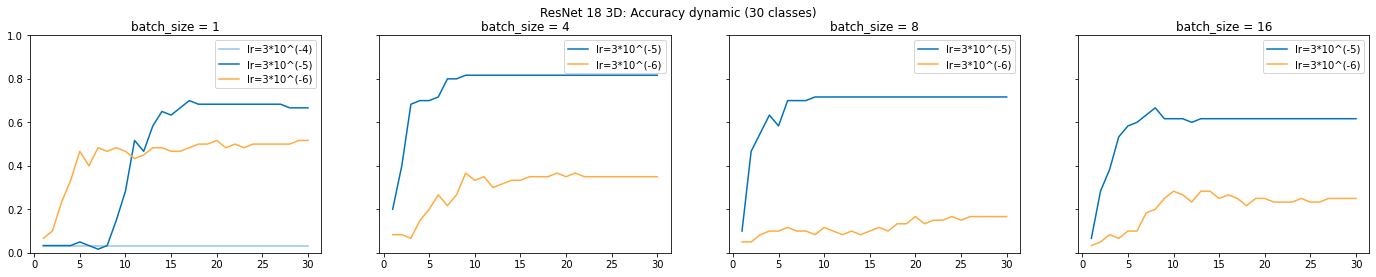

In [3]:
draw_dynamic(data_30, batch_sizes=batch_sizes_30, n_classes=30, model_folder=model_folder_30, model_name=model_name, type='val_accuracy_dynamic')

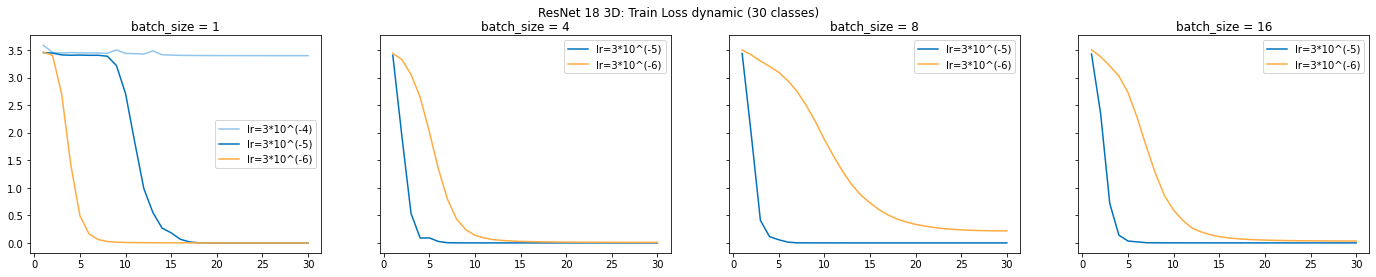

In [4]:
draw_dynamic(data_30, batch_sizes=batch_sizes_30, n_classes=30, model_folder=model_folder_30, model_name=model_name, type='train_loss_dynamic')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


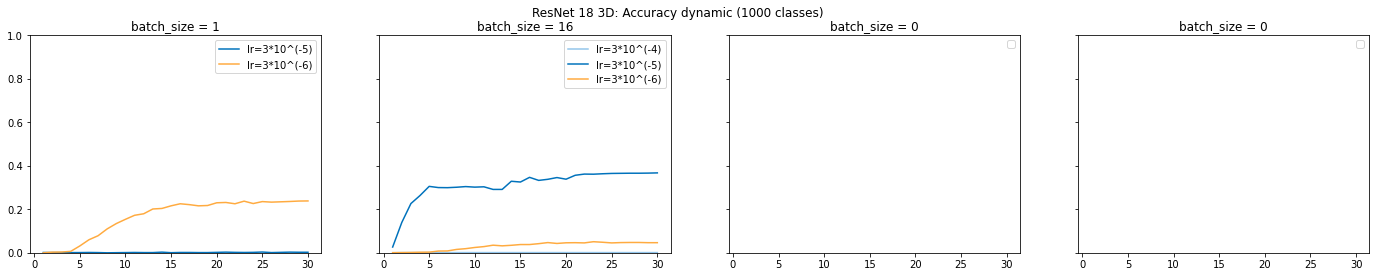

In [5]:
draw_dynamic(data_1000, batch_sizes=batch_sizes_1000, n_classes=1000, model_folder=model_folder_1000, model_name=model_name, type='val_accuracy_dynamic')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


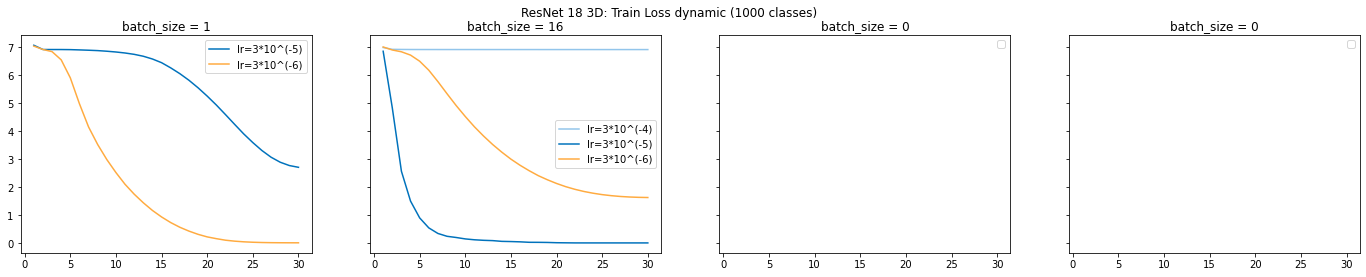

In [6]:
draw_dynamic(data_1000, batch_sizes=batch_sizes_1000, n_classes=1000, model_folder=model_folder_1000, model_name=model_name, type='train_loss_dynamic')

# ResNet 50

In [8]:
model_folder_30 ="/home/jupyter/mnt/s3/rsl-videos/slovo/models/animals/resnet50/"
model_folder_1000 ="/home/jupyter/mnt/s3/rsl-videos/slovo/models/all/resnet50/"
model_name = 'ResNet 50 3D'

data_30 = [
    {'bs': 1, 'lr':'10^(-3)', 'filename': 'ResNet50_animals_lr10-3_loss_acc_dynamic.json'},
    {'bs': 1, 'lr':'10^(-4)', 'filename': 'ResNet50_animals_lr10-4_loss_acc_dynamic.json'},
    {'bs': 1, 'lr':'10^(-5)', 'filename': 'ResNet50_animals_lr10-5_loss_acc_dynamic.json'},
    {'bs': 1, 'lr':'10^(-6)', 'filename': 'ResNet50_animals_lr10-6_loss_acc_dynamic.json'},
]
data_1000 = [
    {'bs': 1, 'lr':'10^(-5)', 'filename': 'ResNet50_all_lr10-5_loss_acc_dynamic.json'},
    {'bs': 1, 'lr':'10^(-6)', 'filename': 'ResNet50_all_lr10-6_loss_acc_dynamic.json'},
    {'bs': 1, 'lr':'10^(-3)', 'filename': 'ResNet50_animals_lr10-3_loss_acc_dynamic.json'},
    {'bs': 1, 'lr':'10^(-4)', 'filename': 'ResNet50_animals_lr10-4_loss_acc_dynamic.json'},
]

batch_sizes_30 = list(set([x['bs'] for x in data_30]))
batch_sizes_30.sort()
batch_sizes_30 = batch_sizes_30 + [0, 0, 0, 0]

batch_sizes_1000 = list(set([x['bs'] for x in data_1000]))
batch_sizes_1000.sort()
batch_sizes_1000 = batch_sizes_1000 + [0, 0, 0, 0]

KeyError: '10^(-3)'

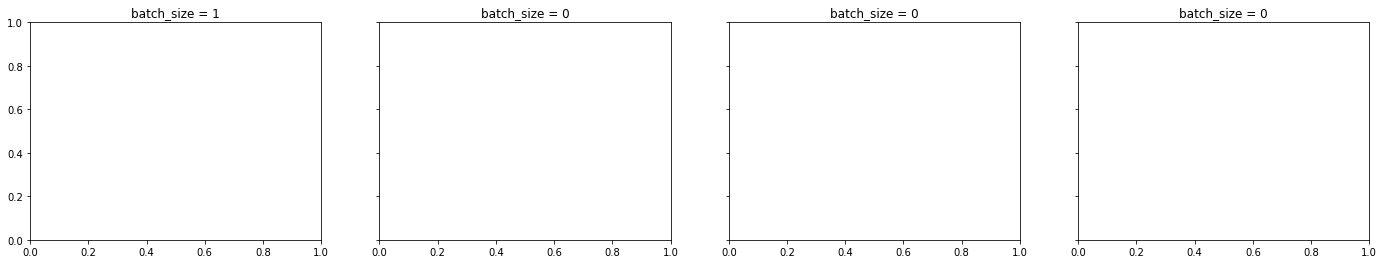

In [9]:
draw_dynamic(data_30, batch_sizes=batch_sizes_30, n_classes=30, model_folder=model_folder_30, model_name=model_name, type='val_accuracy_dynamic')

In [ ]:
draw_dynamic(data_30, batch_sizes=batch_sizes_30, n_classes=30, model_folder=model_folder_30, model_name=model_name, type='train_loss_dynamic')

In [ ]:
draw_dynamic(data_1000, batch_sizes=batch_sizes_1000, n_classes=1000, model_folder=model_folder_1000, model_name=model_name, type='val_accuracy_dynamic')

In [ ]:
draw_dynamic(data_1000, batch_sizes=batch_sizes_1000, n_classes=1000, model_folder=model_folder_1000, model_name=model_name, type='train_loss_dynamic')